# 06_딥 러닝을 이용한 MNIST - MNIST 데이터 - 2

# MNIST fashion data

In [46]:
# 데이터 읽기
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

In [47]:
# X_train.shape, y_train.shape
# X_test.shape, y_test.shape

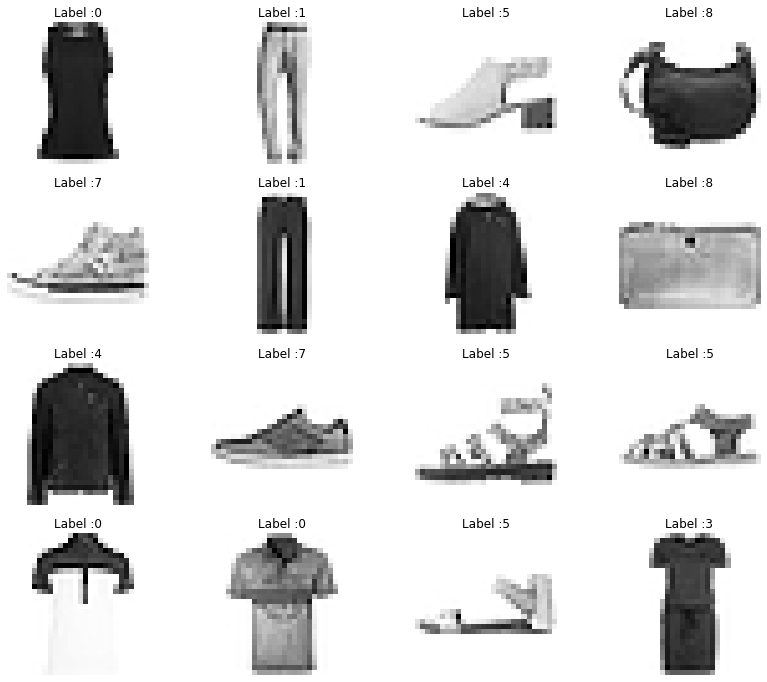

In [48]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, len(y_train)), k = 16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys')
    plt.title('Label :' + str(y_train[n]))
    plt.axis('off')

plt.show()

In [49]:
# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [51]:
import time
start_time = time.time()

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)
print('time : ', time.time() - start_time)

Epoch 1/10
 12/600 [..............................] - ETA: 5s - loss: 1.3511 - accuracy: 0.5233 

2022-06-01 02:43:52.423542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


599/600 [============================>.] - ETA: 0s - loss: 0.4848 - accuracy: 0.8286

2022-06-01 02:43:56.281619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 4s 7ms/step - loss: 0.4848 - accuracy: 0.8286 - val_loss: 0.4312 - val_accuracy: 0.8415
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3601 - accuracy: 0.8694 - val_loss: 0.3769 - val_accuracy: 0.8671
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3235 - accuracy: 0.8811 - val_loss: 0.3485 - val_accuracy: 0.8711
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.3015 - accuracy: 0.8885 - val_loss: 0.3472 - val_accuracy: 0.8748
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2812 - accuracy: 0.8961 - val_loss: 0.3750 - val_accuracy: 0.8640
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2662 - accuracy: 0.9015 - val_loss: 0.3259 - val_accuracy: 0.8798
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2539 - accuracy: 0.9065 - val_loss: 0.3313 - val_accuracy: 0.8826
Epoch 8/10
600/60

In [52]:
hist.history.keys()
# loss : 원 데이터의 손실율
# accuracy : 원 데이터의 정확도
# val_loss : validation 데이터의 손실율
# val_accuracy : validation 데이터의 정확도

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

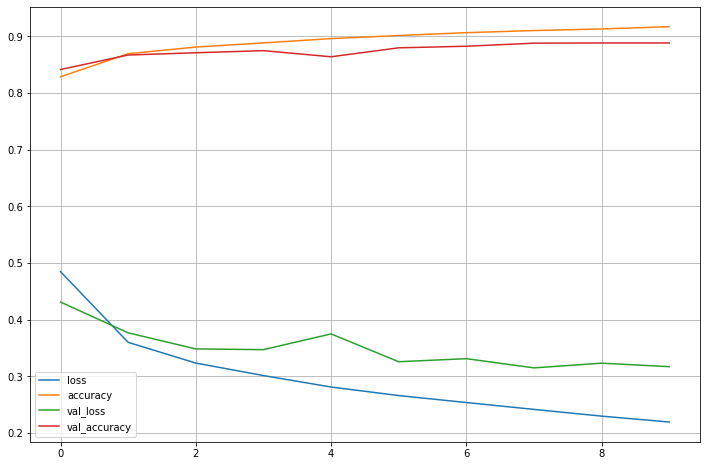

In [53]:
# acc 와 loss 그리기
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'accuracy', 'val_loss', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

> ### `원 데이터`의 loss 와 accuracy 는 좋아보이지만, // (0.2195, 0.9171)
> ### `validation 데이터`의 loss와 accuracy 는 원 데이터의 것을 `따라가지 못하는 것`으로 보인다. // (0.3171, 0.8884)

In [54]:
# 테스트 데이터 accuracy
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])


 37/313 [==>...........................] - ETA: 1s - loss: 0.3214 - accuracy: 0.8885

2022-06-01 02:44:32.399404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8884
Test loss :  0.3171679377555847
Test accuracy :  0.8884000182151794


In [55]:
# 어떤 데이터가 틀렸는지 추출
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
                                                # axis : By default, the index is into the flattened array, otherwise along the specified axis.
predicted_labels[:10]

2022-06-01 02:44:33.814811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [56]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [57]:
# 틀린 데이터 찾기
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)
        # index 가 들어가 있음.

1116

In [58]:
# 틀린데이터 무작위 선출
import random

samples = random.choices(population=wrong_result, k = 16)
                                    # index 리스트에서 
                                                    # random 하게 16개를 선택

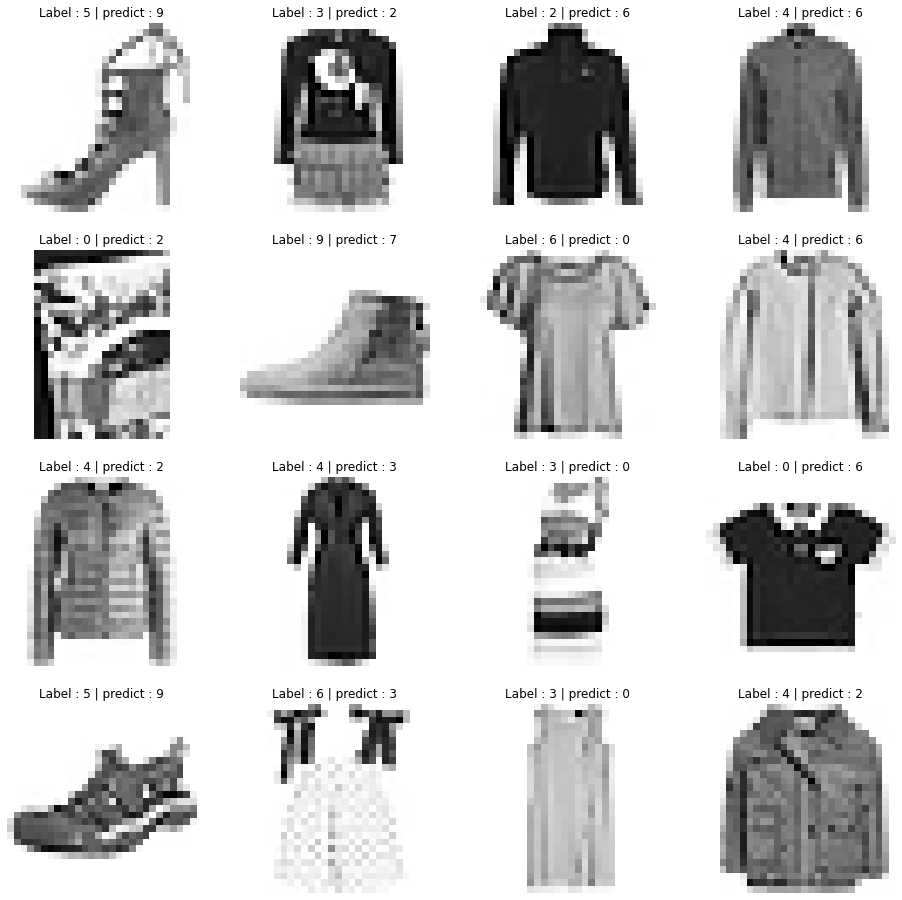

In [59]:
plt.figure(figsize=(16,16))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' | predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()